# Sentinel-2 Compositing Tool
Created by Adriana Caswell, Christian Devey, and Muhammad Ba

This tool creates median value composites for Sentinel-2 bands, resamples them to 10 m, and provides statistics about the composite.

## Instructions
1. Download Sentinel-2 imagery for your area of interest from the [Copernicus Browser](https://browser.dataspace.copernicus.eu/?zoom=5&lat=50.16282&lng=20.78613&themeId=DEFAULT-THEME&visualizationUrl=U2FsdGVkX1%2FJM9kH%2BZTOodn54nQTsQojRItObJfZovzmGSowX5hLBm%2BFj2vfLZW%2FN2uZri%2FbvtjYDsX6u2J9wEGs7i4wLVFnhsQEAJQ5vCeK530XHWUgopyvijgM9lOU&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30&dateMode=SINGLE).
2. In the *User input* section, define `inputS2` as directory where zipped Sentinel-2 SAFE files are saved.
3. Within `inputS2` directory, set up the `clippedS2` subdirectory - this is where clipped TIFF files will be saved
4. Within `inputS2` directory, set up the `composites` subdirectory - this is composites and resampled composites will be saved
5. In the *User input* section, define `aoiShp` as the path to the area of interest shapefile.
6. In the *User input* section, define `lineSpacing` as ...
7. Run the code blocks below.

In [1]:
# import python modules
import os
import s2composite as s2
import rasterio as rio
from rasterio.plot import show

## User inputs

In [2]:
# path to folder containing raw Sentinel-2 files
inputS2 = "demo\S2"

# paths to intermediate files
clippedS2 = os.path.join(inputS2, 'clippedS2') # S2 files clipped to AOI and converted to TIFFs
compS2 = os.path.join(inputS2, 'composites') # median value composites

# path to area of interest shapefile
aoiShp = "demo\StudyArea\StudyArea.shp"

# line spacing for grid statistics (in meters)
lineSpacing = 1000

## Create composites

In [3]:
# read in S2 files, clip to AOI, and convert to TIFF
s2.prepS2(inputS2, aoiShp, clippedS2)

# sort bands
bands, meta10m, meta20m, meta60m = s2.sortBands(clippedS2)

# create median value composite
s2.compositeBands(bands, meta10m, meta20m, meta60m, compS2)

Clipping and converting 4 Sentinel-2 images...
Overwriting S2B_MSIL2A_20221229T101329_N0510_R022_T32TMM_20240806T072335_10m_clip.tif
Overwriting S2B_MSIL2A_20221229T101329_N0510_R022_T32TMM_20240806T072335_20m_clip.tif
Overwriting S2B_MSIL2A_20221229T101329_N0510_R022_T32TMM_20240806T072335_60m_clip.tif
Overwriting S2B_MSIL2A_20250219T101959_N0511_R065_T32TML_20250219T142054_10m_clip.tif
Overwriting S2B_MSIL2A_20250219T101959_N0511_R065_T32TML_20250219T142054_20m_clip.tif
Overwriting S2B_MSIL2A_20250219T101959_N0511_R065_T32TML_20250219T142054_60m_clip.tif
Overwriting S2C_MSIL2A_20250211T101201_N0511_R022_T32TNL_20250211T142256_10m_clip.tif
Overwriting S2C_MSIL2A_20250211T101201_N0511_R022_T32TNL_20250211T142256_20m_clip.tif
Overwriting S2C_MSIL2A_20250211T101201_N0511_R022_T32TNL_20250211T142256_60m_clip.tif
Overwriting S2C_MSIL2A_20250221T101051_N0511_R022_T32TNM_20250221T174112_10m_clip.tif
Overwriting S2C_MSIL2A_20250221T101051_N0511_R022_T32TNM_20250221T174112_20m_clip.tif
Overwri

In [4]:
# resample median value composites
composites = s2.resampleBandsTo10m(compS2, overwrite = False)

Resampling 8 bands to 10m resolution using bilinear...
Resampled: demo/S2\composites\B01_resampled_10m.tif
Resampled: demo/S2\composites\B02_resampled_10m.tif
Resampled: demo/S2\composites\B03_resampled_10m.tif
Resampled: demo/S2\composites\B04_resampled_10m.tif
Resampled: demo/S2\composites\B05_resampled_10m.tif
Resampled: demo/S2\composites\B08_resampled_10m.tif
Resampled: demo/S2\composites\B11_resampled_10m.tif
Resampled: demo/S2\composites\B12_resampled_10m.tif
Resampling complete.


## Composite statistics

In [ ]:
# run stats function

## Display composites

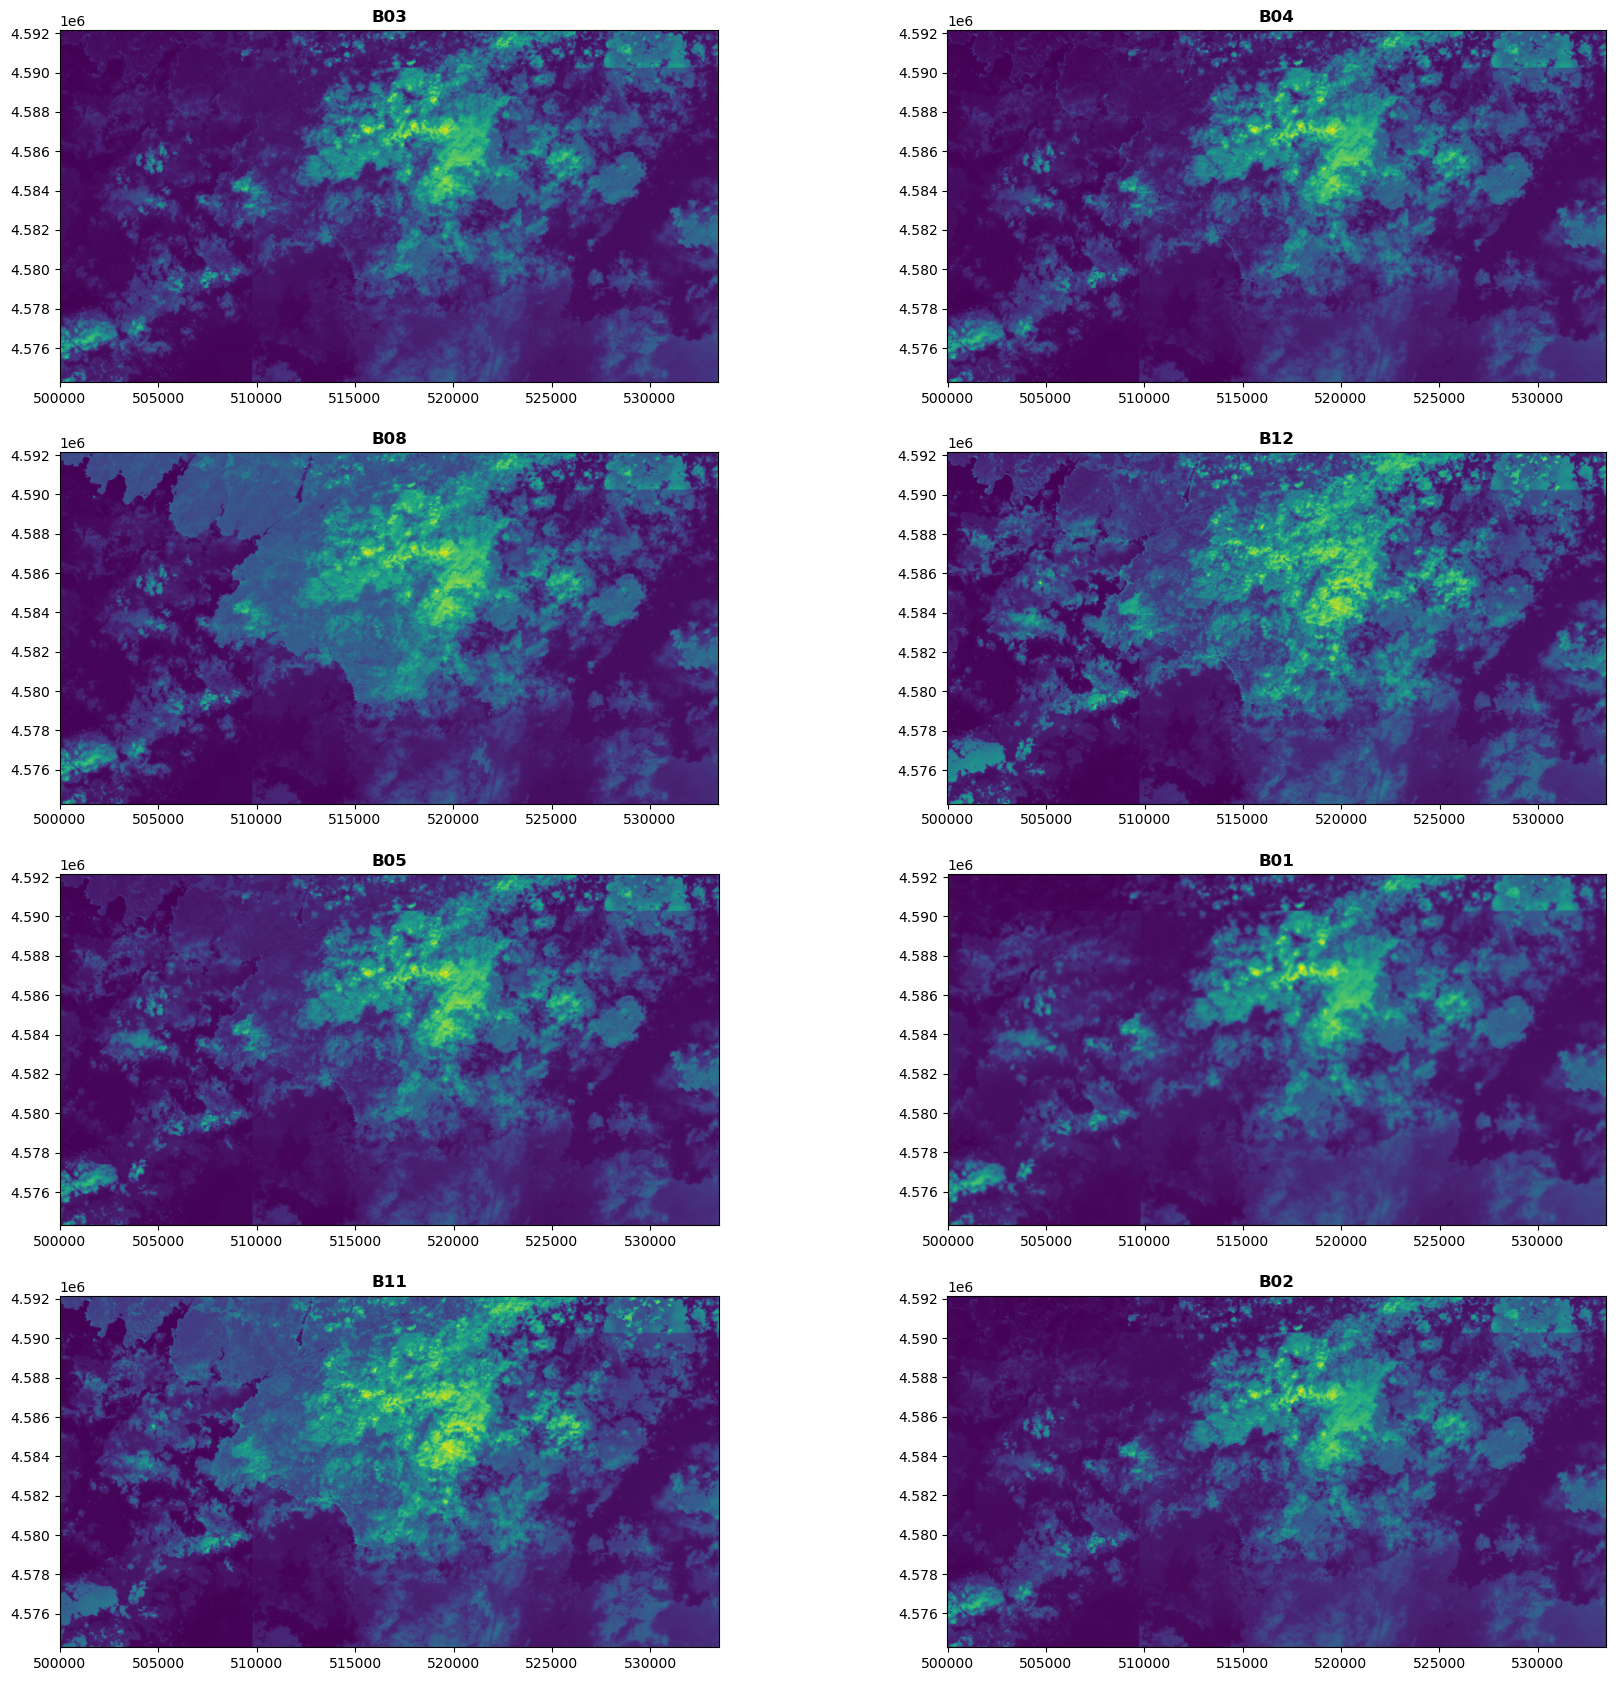

In [9]:
# display all band composites
s2.showBands(composites)

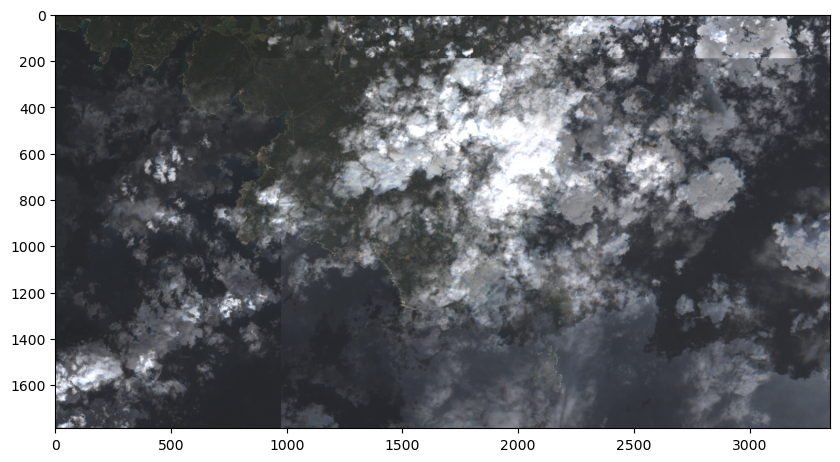

In [10]:
# display RGB composite
R = "demo/S2/composites/B04_resampled_10m.tif"
G = "demo/S2/composites/B03_resampled_10m.tif"
B = "demo/S2/composites/B02_resampled_10m.tif"

s2.showRGB(R, G, B)

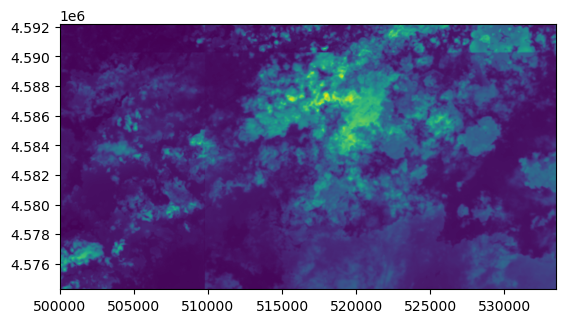

In [12]:
# display band of interest
boi = "demo/S2/composites/B01_resampled_10m.tif"

with rio.open(boi) as src:
    show(src)